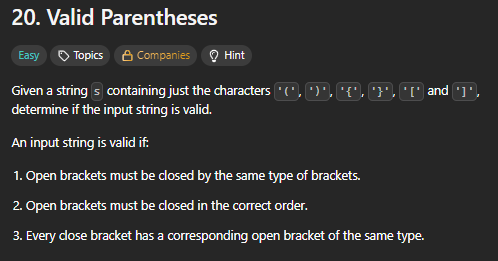

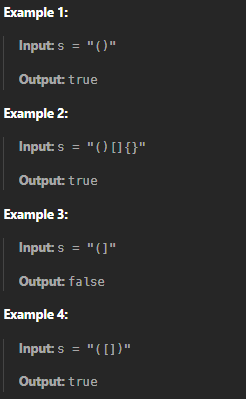

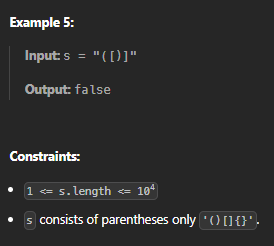

In [1]:
def isvalid(s):
    stack = []
    hashmap = { ")":"(","}":"{","]":"["}
    for e in s:
        if stack and (e in hashmap and stack[-1]==hashmap[e]):
            stack.pop()
        else:
            stack.append(e)
    return  not stack

In [3]:
isvalid('(){}[')

False

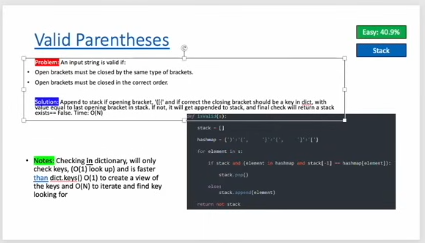

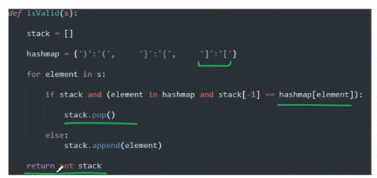

---------------------------------------------------------------------------------------------------------------------

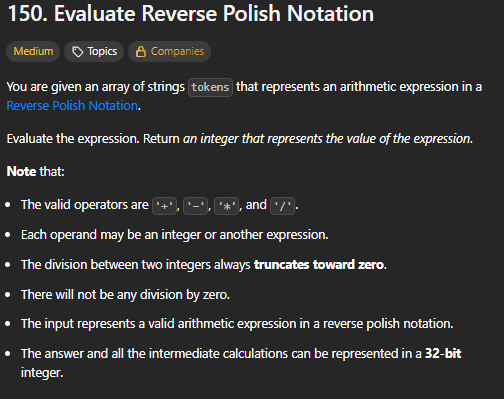

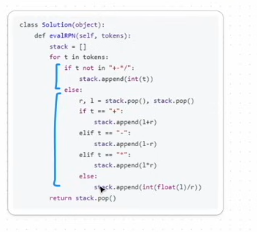

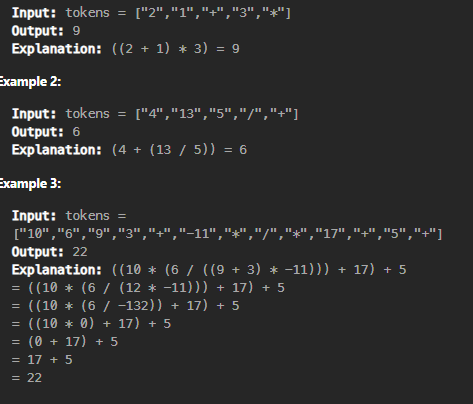

In [7]:
def RPN(tokens):
    stack = []
    for i in tokens:
        if i not in "+-*/":
            stack.append(int(i))
        else:
            r,l = stack.pop(),stack.pop()
            if i == '+':
                stack.append(l+r)
            elif i == '-':
                stack.append(l-r)
            elif i == '*':
                stack.append(l*r)
            else:
                stack.append(int(float(l)/r))

    
    return stack.pop()
            

In [8]:
tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]
RPN(tokens)

22

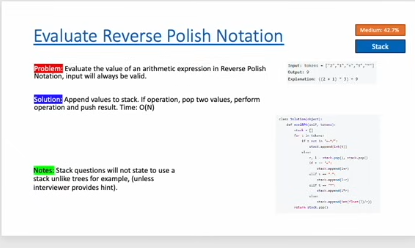

--------------------------------------------------------------------------------------------------------------------------------

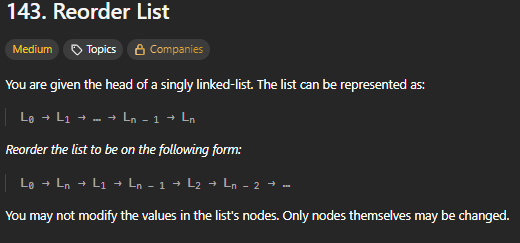

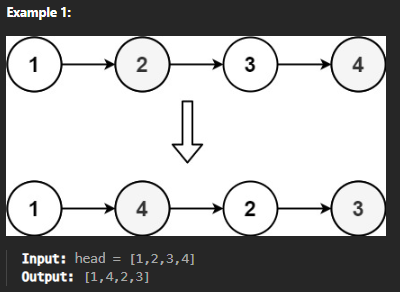

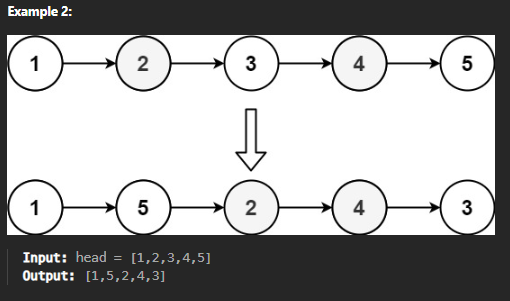

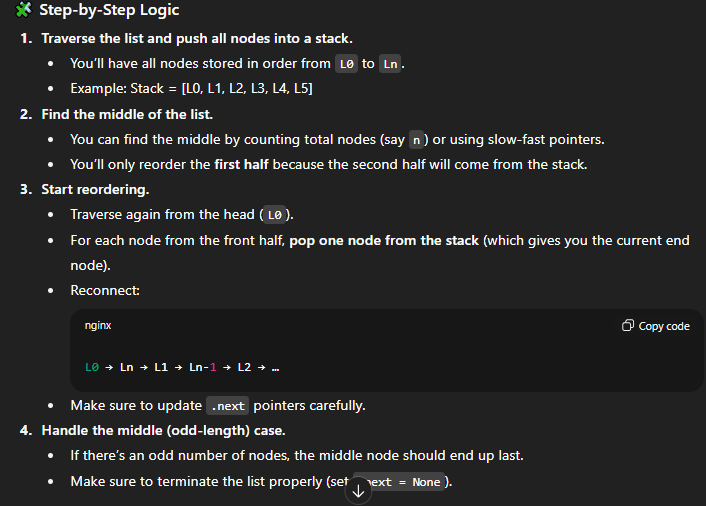

In [11]:
def reorder(head):
    if not head or not head.next:
        return 
    stack = []
    curr = head
    while curr:
        stack.append(curr)
        curr = curr.next

    curr = head
    n = len(stack)

    for _ in range(n//2):
        tail = stack.pop()
        tail.next = curr.next
        curr.next = tail
        curr = tail.next

    if curr:
        curr.next = None
        

In [12]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

In [16]:
L5 = ListNode(5)
L4 = ListNode(4,L5)
L3 = ListNode(3,L4)
L2 = ListNode(2,L3)
L1 = ListNode(1,L2)

In [20]:
reorder(L1)

----------------------------------------------------------------------------------------

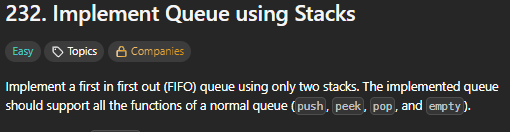

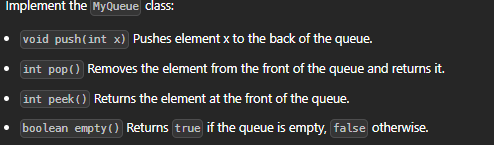

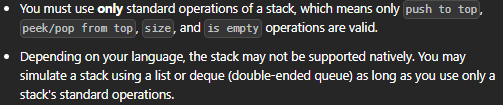

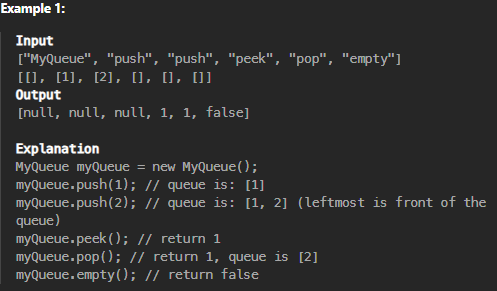

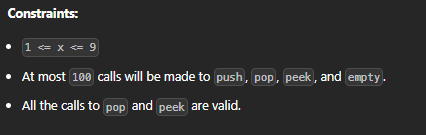

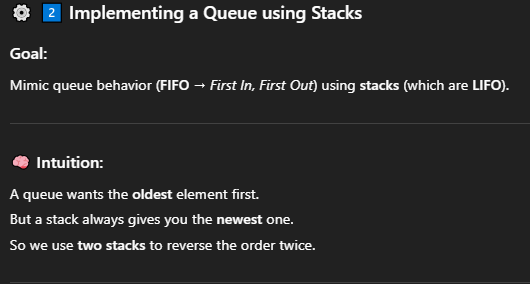
\
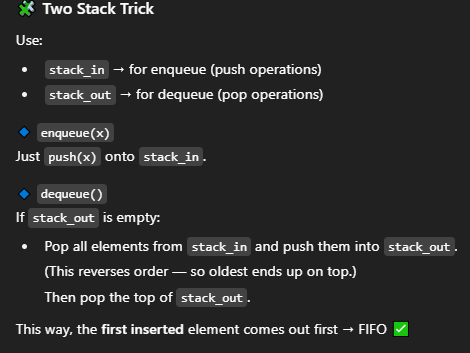

In [21]:
class MyQueue:

    def __init__(self):
        self.stack_in = []
        self.stack_out = []
        

    def push(self, x: int) -> None:
        self.stack_in.append(x)

    def pop(self) -> int:
        if not self.stack_out:
            while self.stack_in:
                self.stack_out.append(self.stack_in.pop())
        return self.stack_out.pop()

    def peek(self) -> int:
        if not self.stack_out:
            while self.stack_in:
                self.stack_out.append(self.stack_in.pop())
        return self.stack_out[-1]
        
    def empty(self) -> bool:
        return not self.stack_in and not self.stack_out


# Your MyQueue object will be instantiated and called as such:
# obj = MyQueue()
# obj.push(x)
# param_2 = obj.pop()
# param_3 = obj.peek()
# param_4 = obj.empty()

-----------------------------------------------------------------------------------------------------------

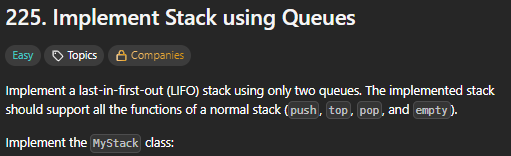

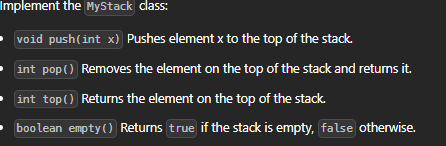

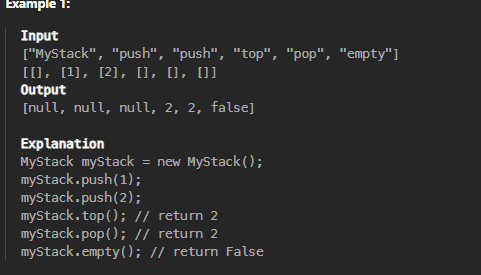

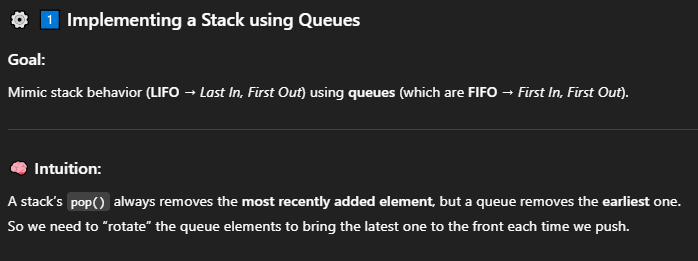

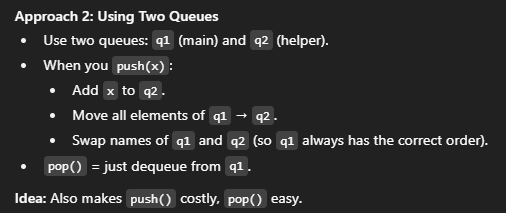

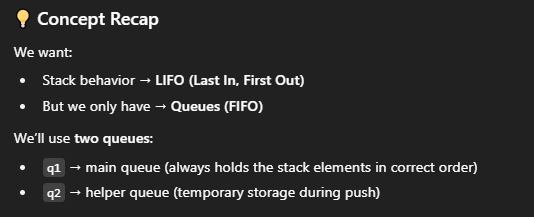

In [1]:
from collections import deque

class MyStack:
    def __init__(self):
        self.q1 = deque()  # main queue
        self.q2 = deque()  # helper queue

    def push(self, x: int) -> None:
        """
        Push element x onto stack.
        """
        # Step 1: Add new element to q2
        self.q2.append(x)

        # Step 2: Move all elements from q1 to q2
        while self.q1:
            self.q2.append(self.q1.popleft())

        # Step 3: Swap q1 and q2
        self.q1, self.q2 = self.q2, self.q1

    def pop(self) -> int:
        """
        Removes the element on top of the stack and returns it.
        """
        return self.q1.popleft()

    def top(self) -> int:
        """
        Get the top element.
        """
        return self.q1[0]

    def empty(self) -> bool:
        """
        Returns whether the stack is empty.
        """
        return not self.q1
